# MNIST (dígitos) solución tradicional

__Integrantes:__

+ Nombre: Daniel Galvis T.
+ Nombre: Luis Fernando Muñoz

__Números asignados:__ 2 y 8


## Taller 

_Suponga que trabajan para el desarrollo de un sistema de lectura y reconocimiento de dígitos. Para este trabajo le han proporcionado un conjunto de fotos en grises con el fin que proponga una solución de programación tradicional, es decir, sin el uso de la inteligencia artificial. El software que proponga debe tener la capacidad de determinar con una precisión una muestra de los datos que le han suministrado_

Durante la clase se le proporcionaran dos números para trabajar:
+ 1 y 5
+ 8 y 2
+ 9 y 7
+ 0 y 3
+ 4 y 6

**Evaluación del método**

Seleccione aleatoriamente una muestra de 30% de los datos, en donde se incluya un balance entre los dígitos asignados (despliéguelo y evidencie las cantidades).

Utilice la muestra obtenida y evalué el software (proceso o métodos) que ha propuesto, es decir, a cuantos números acertó (VP) contra los que no acertó (FP), calcule los siguientes datos:

```
Para el primer número

Reales =  número de datos

Estimados = cantidad de dígitos estimados correctamente 

Para el segundo número

Reales =  número de datos

Estimados = cantidad de dígitos estimados correctamente
```
_Para todos los números que le corresponden_

$ Precision = \frac{VP}{VP+FP}$


Finalmente, despliegue el tiempo que tomo todo el proceso de evaluación.

#### Entregas

+ Prepare una presentación donde muestre los resultados
+ Envié por un correo electrónico este archivo ipynb con la solución y resultados conseguidos


#### Paquetes

In [2]:
from sklearn.datasets import load_digits
import pylab as pl
import sklearn

In [3]:
# cargamos los datos y desplegamos el objeto
digits = load_digits()
type(digits)

sklearn.utils.Bunch

In [4]:
# observe las propieades del objeto, ¿a que tipo se le parece?
?sklearn.utils.Bunch

Se tienen en total: 1797 imágenes
[[ 0.  0.  9. 14.  8.  1.  0.  0.]
 [ 0.  0. 12. 14. 14. 12.  0.  0.]
 [ 0.  0.  9. 10.  0. 15.  4.  0.]
 [ 0.  0.  3. 16. 12. 14.  2.  0.]
 [ 0.  0.  4. 16. 16.  2.  0.  0.]
 [ 0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  1. 15.  1.  3. 16.  8.  0.]
 [ 0.  0. 11. 16. 15. 11.  1.  0.]]


<Figure size 432x288 with 0 Axes>

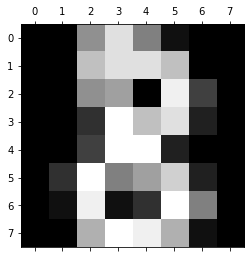

In [7]:
pl.gray() # Queremos las imágenes en grises
pl.matshow(digits.images[8]) # Imprimir una imagen dada
numImagenes = len(digits.images) # Numero de imagenes, len es un método que provee el tamaño del arreglo
print("Se tienen en total:", numImagenes, "imágenes")
print(digits.images[8]) # Ver su representación en pixeles

Observe cada atributo del objeto digits, recorra cada imagen y obtenga su representación (_target_)

#### Solución

## Definicion Algoritmos

In [30]:
def is_two(matrix):
    max_light = -1
    rightmost_max = -1
    for i in range(len(matrix[0])):
        if matrix[0][i] >= max_light:
            max_light = matrix[0][i]
            rightmost_max = i
    if rightmost_max == len(matrix[0]) - 1:
        return False
    if matrix[1][rightmost_max + 1] >= max_light:
        max_light = matrix[1][rightmost_max + 1]
        rightmost_max = rightmost_max + 1
    else:
        max_light = -1
        new_rightmost_max = -1
        for i in range(len(matrix[1])):
            if matrix[1][i] >= max_light:
                max_light = matrix[1][i]
                new_rightmost_max = i
        
        if new_rightmost_max != rightmost_max + 1:
            return False
        rightmost_max = new_rightmost_max
    going_to_left = True
    going_to_right = True
    i = 2
    while going_to_right and i < len(matrix) - 1 and rightmost_max != len(matrix[0]):
        if matrix[i][rightmost_max - 1] >= max_light:
            going_to_right = False
            rightmost_max = rightmost_max - 1
            max_light = matrix[i][rightmost_max - 1]
        elif matrix[i][rightmost_max - 1] >= max_light:
            rightmost_max = rightmost_max + 1
            max_light = matrix[i][rightmost_max + 1]
        else:
            max_light = -1
            new_rightmost_max = -1
            for j in range(len(matrix[i])):
                if matrix[i][j] >= max_light:
                    max_light = matrix[i][j]
                    new_rightmost_max = j
            if new_rightmost_max == rightmost_max - 1:
                going_to_right = False
                rightmost_max = new_rightmost_max
            elif new_rightmost_max == rightmost_max + 1:
                rightmost_max = new_rightmost_max
            else:
                return False
        i = i+1
        
    going_to_right = False
    if (i == len(matrix) - 1):
        return False
    
    going_to_left = True
    
    while going_to_left and i < len(matrix) and rightmost_max != 0:
        max_light = -1
        new_rightmost_max = -1
        for j in range(len(matrix[i])):
            if matrix[i][j] >= max_light:
                max_light = matrix[i][j]
                new_rightmost_max = j
        if new_rightmost_max == rightmost_max or new_rightmost_max == rightmost_max - 1:
            rightmost_max = new_rightmost_max
        elif new_rightmost_max == rightmost_max + 1:
            going_to_left = False
            rightmost_max = new_rightmost_max
        else:
            return False
        i = i+1
    
    going_to_left = False
    if i == len(matrix) - 1 or rightmost_max == len(matrix[0]) - 1:
        return False
    going_to_right = True
    stop = False
    while not stop:
        pos_right = rightmost_max + 1
        if rightmost_max == len(matrix[0]) or i == len(matrix[0]):
            return True
        if rightmost_max != 0 and matrix[i][rightmost_max - 1] >= matrix[i+1][pos_right] and matrix[i][rightmost_max - 1] >= matrix[i+1][rightmost_max] and matrix[i][rightmost_max - 1] >= matrix[i][rightmost_max]:
            return False
        
        if matrix[i][pos_right] >= matrix[i+1][pos_right] and matrix[i][pos_right] >= matrix[i+1][rightmost_max]:
            rightmost_max = pos_right
        elif matrix[i+1][pos_right] >= matrix[i+1][rightmost_max]:
            i = i+1
            rightmost_max = pos_right
        else:
            i = i+1
        if rightmost_max == len(matrix[0]) - 1 or i == len(matrix) - 1:
            stop = True
    
    return True

In [94]:
def is_eight(matrix):
    leftLimit = len(matrix[0])-1
    rightLimit = 0
    maxLight = 10
    close_first_ball_left = False
    close_first_ball_right = False
    open_second_ball_left = False
    open_second_ball_right = False
    stillEight = True
    for row in range(len(matrix)):
        first = len(matrix[0])-1
        last = 0
        a = 0
        while a < len(matrix[row]):
            if matrix[row][a] <= 5:
                a = a+1
            else:
                break
        first = a
        #print(str(first) + " primero")
        while a < len(matrix[row]):
            if matrix[row][a] >= maxLight-5:
                last = a
            a = a+1
        #print (str(last) + " ultimo")
        for column in range(len(matrix[row])-1):
            if matrix[row][column] >= maxLight-5:
                if row <= 2:
                    if leftLimit > column:
                        leftLimit = column
                    if rightLimit < column:
                        rightLimit = column
                else:
                    if leftLimit < column & column == first:
                        close_first_ball_left = True
                    if rightLimit > column & column == last:
                        close_first_ball_right = True
                    if (close_first_ball_left | close_first_ball_right) & leftLimit >= column & column == first:
                        open_second_ball_left = True
                    if (close_first_ball_left | close_first_ball_right) & rightLimit < column & column == last:
                        open_second_ball_right = True
                maxLight = matrix[row][column]
        #print (str(leftLimit) + " limIzquierdo")
       # print (str(rightLimit) + " limDerecho")
    #print(str(close_first_ball_left) + " " + str(close_first_ball_right) + " " + str(open_second_ball_left) + " " + str(open_second_ball_right))
    if close_first_ball_left == True & close_first_ball_right == True:
        return True
    elif open_second_ball_left == True & open_second_ball_right == True:
        return True
    else: return False

## Parte 1

In [95]:
index_of_numbers = []
index_of_twos = []
index_of_eights = []
for i in range(len(digits.images)):
    if digits.target[i] == 2 or digits.target[i] == 8:
        index_of_numbers.append(i)

In [10]:
from random import sample

In [11]:
index_of_numbers_sample = sample(index_of_numbers, int(0.3*len(index_of_numbers)))

In [96]:
twos_correct = 0
eights_correct = 0
for index in index_of_numbers_sample:
    if is_eight(digits.images[index]) and digits.target[index] == 8:
        eights_correct = eights_correct + 1
    elif is_two(digits.images[index]) and digits.target[index] == 2:
        twos_correct = twos_correct + 1
exactitud = twos_correct + eights_correct
total_sample = len(index_of_numbers_sample)
print (f"EXACTITUD TOTAL: {exactitud} SOBRE {total_sample}")

EXACTITUD TOTAL: 34 SOBRE 105


In [97]:
import time
start = time.time()
twos_correct = 0
eights_correct = 0
any_correct = 0
for index in range(numImagenes):
    if is_eight(digits.images[index]) and digits.target[index] == 8:
        eights_correct = eights_correct + 1
    elif is_two(digits.images[index]) and digits.target[index] == 2:
        twos_correct = twos_correct + 1
    elif digits.target[index] != 2 and digits.target[index] != 8:
        any_correct = any_correct + 1

exactitud = twos_correct + eights_correct + any_correct
precision = exactitud / numImagenes
end = time.time()
total_time = end - start

print (f"Se tuvo una precision de {exactitud} sobre {numImagenes}")
print (f"Es decir: {precision}")
print (f"El tiempo total de ejecución fue de: {total_time} segundos")

Se tuvo una precision de 1564 sobre 1797
Es decir: 0.8703394546466333
El tiempo total de ejecución fue de: 0.3381383419036865 segundos
